In [1]:
pip install ffmpeg-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/840.9 kB ? eta -:--:--
     - ----------------------------------- 41.0/840.9 kB 991.0 kB/s eta 0:00:01
     ------ ------------------------------- 143.4/840.9 kB 1.4 MB/s eta 0:00:01
     ------------ ------------------------- 276.5/840.9 kB 1.9 MB/s eta 0:00:01
     ------------------ ------------------- 399.4/840.9 kB 2.1 MB/s eta 0:00:01
     ---------------------- --------------- 491.5/840.9 kB 2.2 MB/s eta 0:00:01
     ----------------------- -------------- 512.0/840.9 kB 1.8 MB/s eta 0:00:01
     ------------------------------ ------- 665.6/840.9 kB 2.1 MB/s eta 0:00:01
     -------------------------------------  839.7/840.9 kB 2.4 MB/s eta 0:00:01
     -------------------------------------  839.7/840.9 kB 2.4 MB/s eta 0:00:01
     -------------------------------------  839.7/840.9 kB 2.4 


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/15/aa/3f4c7bcee2057a76562a5b33ecbd199be08cdb4443a02e26bd2c3cf6fc39/pip-23.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 187.9 kB/s eta 0:00:12
    --------------------------------------- 0.0/2.1 MB 196.9 kB/s eta 0:00:11
   - -------------------------------------- 0.1/2.1 MB 302.7 kB/s eta 0:00:07
   -- ------------------------------------- 0.2/2.1 MB 538.9 kB/s eta 0:00:04
   ----- ---------------------------------- 0.3/2.1 MB 930.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.1 MB 1.1 MB/s 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from matplotlib.font_manager import FontProperties as FP

#Setup ffmpeg location
plt.rcParams['animation.ffmpeg_path'] = './ffmpeg/bin/ffmpeg.exe'

#Setup fig size
plt.rcParams['figure.figsize'] = (20,12)

#Setup font
font = FP(fname="./Font/SimHei.ttf")

#Set style
plt.style.use('ggplot')

In [2]:
#Read File
df = pd.read_excel("./Data/CPI_by_type.xlsx")

In [3]:
x = df['統計期']
y1 = df['一.食物類']
y2 = df['二.衣著類']
y3 = df['三.居住類']
y4 = df['四.交通及通訊類']
y5 = df['五.醫藥保健類']
y6 = df['六.教養娛樂類']
y7 = df['七.雜項類']

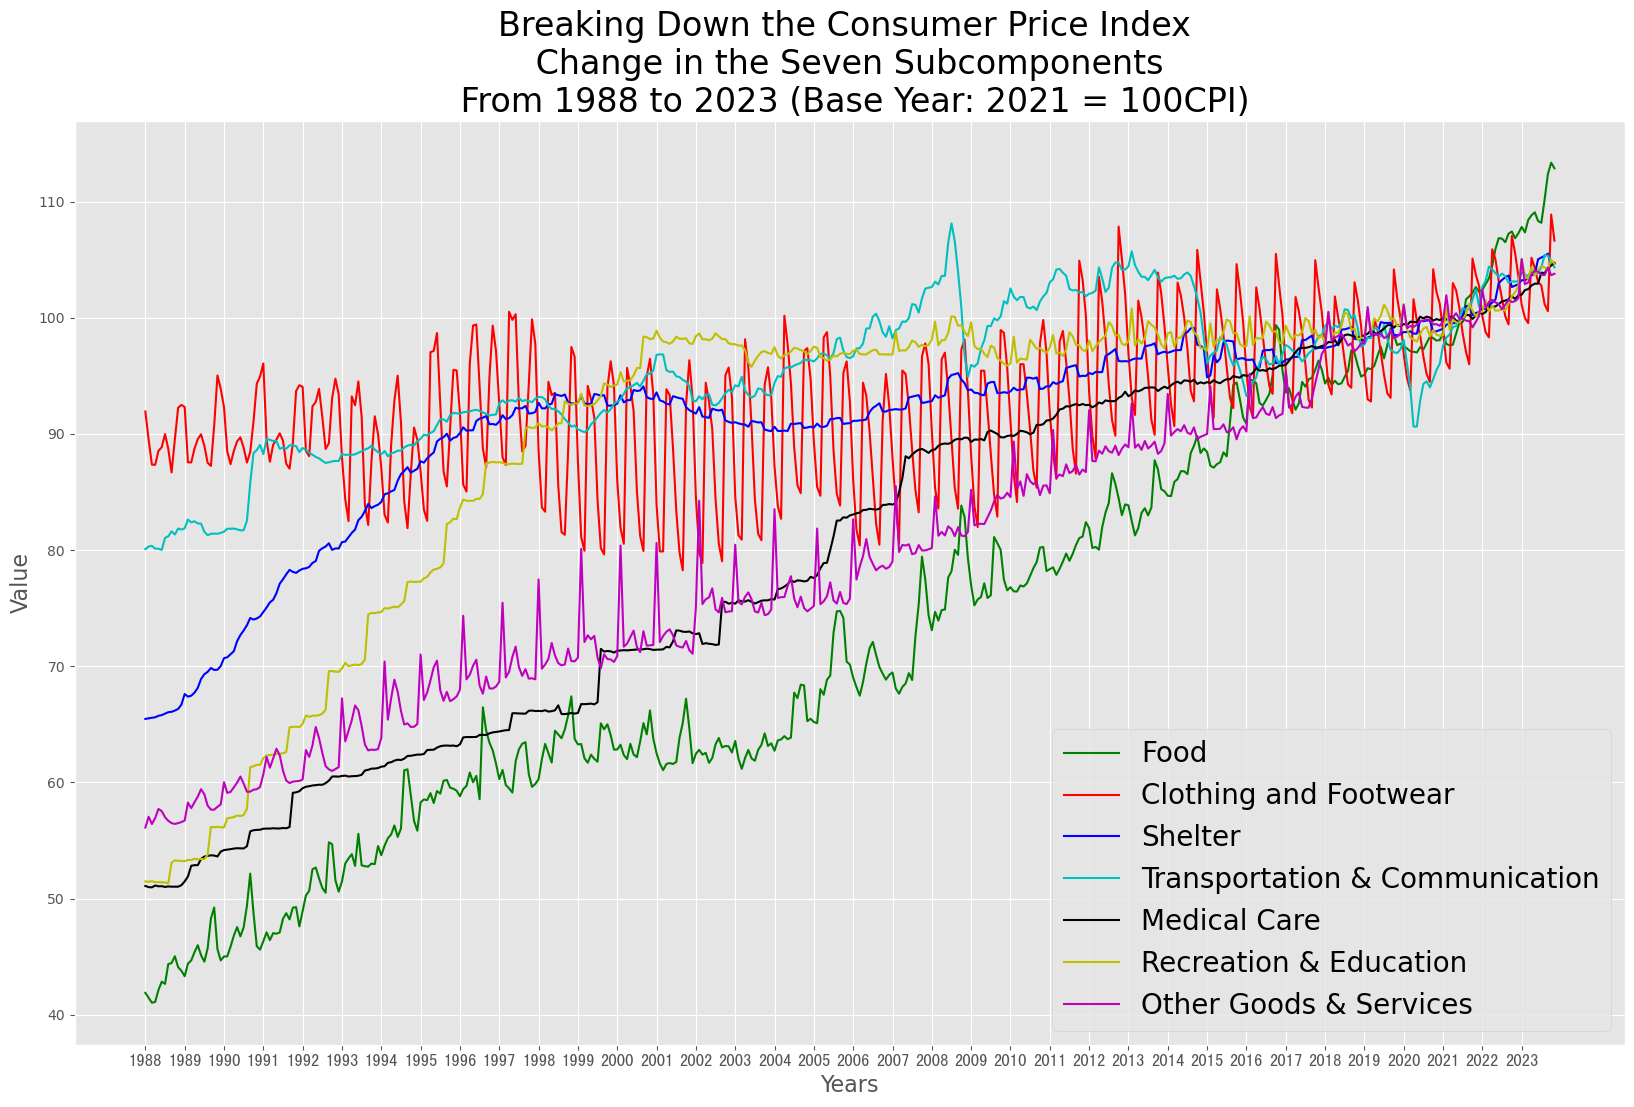

In [9]:
fig, ax = plt.subplots()

#Set custom label for x axis
values = [ n*12 for n in range(0,36)] #[0,12,24]
test_X = [ str(year) for year in range(1988,2024) ]
plt.xticks(values,test_X,fontsize=12, fontproperties=font )

#Set title and labels 
plt.title("Breaking Down the Consumer Price Index \n Change in the Seven Subcomponents \n From 1988 to 2023 (Base Year: 2021 = 100CPI)", fontsize=24)
plt.xlabel("Years", fontsize=16)
plt.ylabel("Value", fontsize=16)

line_1, = ax.plot(x.values, y1.values, 'g-', label = 'Food')
line_2, = ax.plot(x.values, y2.values, 'r-', label = 'Clothing and Footwear')
line_3, = ax.plot(x.values, y3.values, 'b-', label = 'Shelter')
line_4, = ax.plot(x.values, y4.values, 'c-', label = 'Transportation & Communication')
line_5, = ax.plot(x.values, y5.values, 'k-', label = 'Medical Care')
line_6, = ax.plot(x.values, y6.values, 'y-', label = 'Recreation & Education')
line_7, = ax.plot(x.values, y7.values, 'm-', label = 'Other Goods & Services')

#Set legend
plt.legend(loc='lower right', prop={'size': 20} , bbox_to_anchor=(1,0))

def animate(i):
    
    # update the data.
    line_1.set_data(x.values[:i], y1.values[:i])  
    line_2.set_data(x.values[:i], y2.values[:i])  
    line_3.set_data(x.values[:i], y3.values[:i])  
    line_4.set_data(x.values[:i], y4.values[:i])  
    line_5.set_data(x.values[:i], y5.values[:i])  
    line_6.set_data(x.values[:i], y6.values[:i])  
    line_7.set_data(x.values[:i], y7.values[:i])  

    return line_1, line_2, line_3, line_4, line_5, line_6, line_7

ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=500) 
    #save_count default is 100 frames->meaning without specifying this parameter, only first 100 rows will be draw in the animation video

ani.save("CPI_Subcomponent.mp4")

plt.show()